# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [18]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [2]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv('apartments_clean.csv')
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,district,area_comfort
0,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,Оболонський,10.0
1,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,Оболонський,13.0
2,135000.0,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,Оболонський,22.0
3,84000.0,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,Оболонський,11.0
4,60000.0,1.0,1463.0,2.0,26.0,2009.0,41.0,37.0,14.0,Дніпровська,Оболонський,0.0


## 1. Визначення типів покажчиків вхідного датасету

In [ ]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = data['Price']
data = data.drop('Price', axis=1)

<class 'KeyError'>: 'Price'

In [6]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((376,), (376, 11))

In [9]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as selector

In [10]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = selector(dtype_include=np.number)
category_selector = selector(dtype_include='object')

In [11]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street', 'district']


In [12]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data[numeric_data_columns]
data_category = data[category_data_columns]

data_numeric.shape, data_category.shape

((376, 9), (376, 2))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [13]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [15]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max= min_max_scaler.fit_transform(data_numeric)

<AxesSubplot:title={'center':'Нормалізація'}, ylabel='Frequency'>

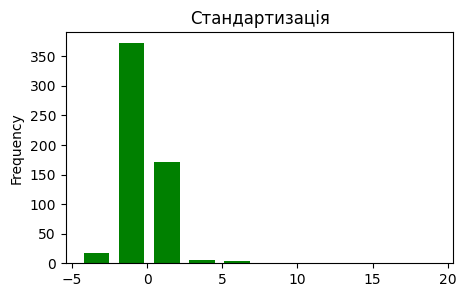

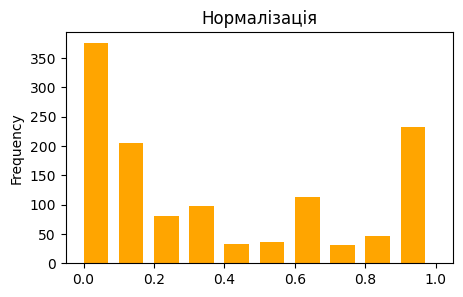

In [19]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні

pd.DataFrame(data_numeric_std).plot(kind='hist', legend=False, color='green', 
                                    figsize=[5, 3], width=1.7, title='Стандартизація')

pd.DataFrame(data_numeric_min_max).plot(kind='hist', legend=False, color='orange', 
                                        figsize=[5, 3], width=0.07, title='Нормалізація')

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.2. Маштабування категоріальних показчиків

In [21]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
## Для показчика district доцільно викорстовувати енкодер OrdinalEncoder, 
## тому що для нас має значення послідовність та, так звана, вага значень цієї ознаки
## Для показчика street доцільно викорстовувати енкодер OneHotEncoder, 
## тому що тут для нас не має значення послідовність

In [22]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = OrdinalEncoder().fit_transform(data_category[['district']])
one_hot_encoder = OneHotEncoder(sparse_output=False).fit_transform(data_category[['street']])

## 3. Побудова трансформера для підготовки даних

In [23]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [24]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
transformer = ColumnTransformer([
    ('ord_categirical_encoder', OrdinalEncoder(), ['district']),
    ('ohe_categirical_encoder', OneHotEncoder(sparse_output=False), ['street']),
    ('numeric_encoder', standart_scaler, numeric_data_columns)
])
print(transformer)

ColumnTransformer(transformers=[('ord_categirical_encoder', OrdinalEncoder(),
                                 ['district']),
                                ('ohe_categirical_encoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['street']),
                                ('numeric_encoder', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen', 'area_comfort'])])


In [25]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(376, 174)

In [26]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
data_transformed = pd.DataFrame(data_transformed, columns=transformer.get_feature_names_out())
target = pd.DataFrame(target)

apartment_transformed = pd.concat([target, data_transformed], axis=1)
apartment_transformed

,Price,ord_categirical_encoder__district,ohe_categirical_encoder__street_Інститутська,ohe_categirical_encoder__street_Іскрівська,ohe_categirical_encoder__street_Автозаводська,ohe_categirical_encoder__street_Азербайджанська,ohe_categirical_encoder__street_Антоновича,ohe_categirical_encoder__street_Багговутівська,ohe_categirical_encoder__street_Балтійський,ohe_categirical_encoder__street_Басейна,...,ohe_categirical_encoder__street_Ясинуватський,numeric_encoder__rooms,numeric_encoder__price_per_m2,numeric_encoder__level,numeric_encoder__levels,numeric_encoder__year,numeric_encoder__area_total,numeric_encoder__area_living,numeric_encoder__area_kitchen,numeric_encoder__area_comfort
0,30970.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.135681,-0.139714,0.434832,-0.500464,0.556523,-1.050589,-0.997549,-1.180457,-0.431288
1,82000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.176094,-0.117996,1.338130,1.059656,0.394280,-0.297370,-0.152619,-0.180040,-0.321841
2,135000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.176094,-0.019208,1.037031,0.699628,0.515962,-0.276447,-0.575084,0.264590,0.006501
3,84000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.176094,-0.118989,-0.468466,1.059656,0.394280,-0.255525,-0.152619,0.264590,-0.394806
4,60000.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.135681,-0.095409,-1.070664,1.059656,0.394280,-0.778594,-0.152619,-0.180040,-0.796113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,42900.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.176094,-0.153118,-1.221214,-1.460538,0.394280,-0.736748,-0.434262,-0.180040,-0.796113
372,115000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.135681,0.047436,-1.070664,-1.220519,0.799887,-0.715825,-0.962343,0.598063,-0.467771
373,39000.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.135681,-0.134626,-0.920115,-1.460538,-1.593194,-0.925053,-0.821522,-0.846984,-0.504253
374,115000.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.783492,-0.136115,0.585382,0.939647,0.191477,-0.192756,-0.152619,-0.180040,-0.139429


In [27]:
# Проінспектувати вихідний датасет `apartment_transformed`
print("Shape of a dataset: ", apartment_transformed.shape)

Shape of a dataset:  (376, 175)


In [28]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv')